In [ ]:
# Notebook Setup 
import sys; import os;sys.path.append(os.path.abspath('..'))# Append path to access folder/script
import warnings; warnings.filterwarnings("ignore")# Ignore Warnings 
from dotenv import load_dotenv; load_dotenv()# Import .env file 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Ingestion

In [ ]:
import pandas as pd

data_path = "../data/processed/HR_Employee_data.csv"
df = pd.read_csv(data_path)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Data Split

In [ ]:
from sklearn.model_selection import train_test_split
from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot,aes, geom_point, geom_bar, labs, facet_wrap

In [ ]:
def stratify_split(df, val_size=0.2, test_size=0.5):
    train_df, temp_df = train_test_split(df, stratify=df['Attrition'], test_size=val_size, random_state=2023)
    val_df, test_df = train_test_split(temp_df, stratify=temp_df['Attrition'], test_size=test_size, random_state=2023)
    return train_df, val_df, test_df

In [ ]:
val_size = 0.2
test_size = 0.50  

train_df, temp_df = train_test_split(df, stratify=df['Attrition'], test_size=val_size, random_state=2023)
val_df, test_df = train_test_split(temp_df, stratify=temp_df['Attrition'], test_size=test_size, random_state=2023)

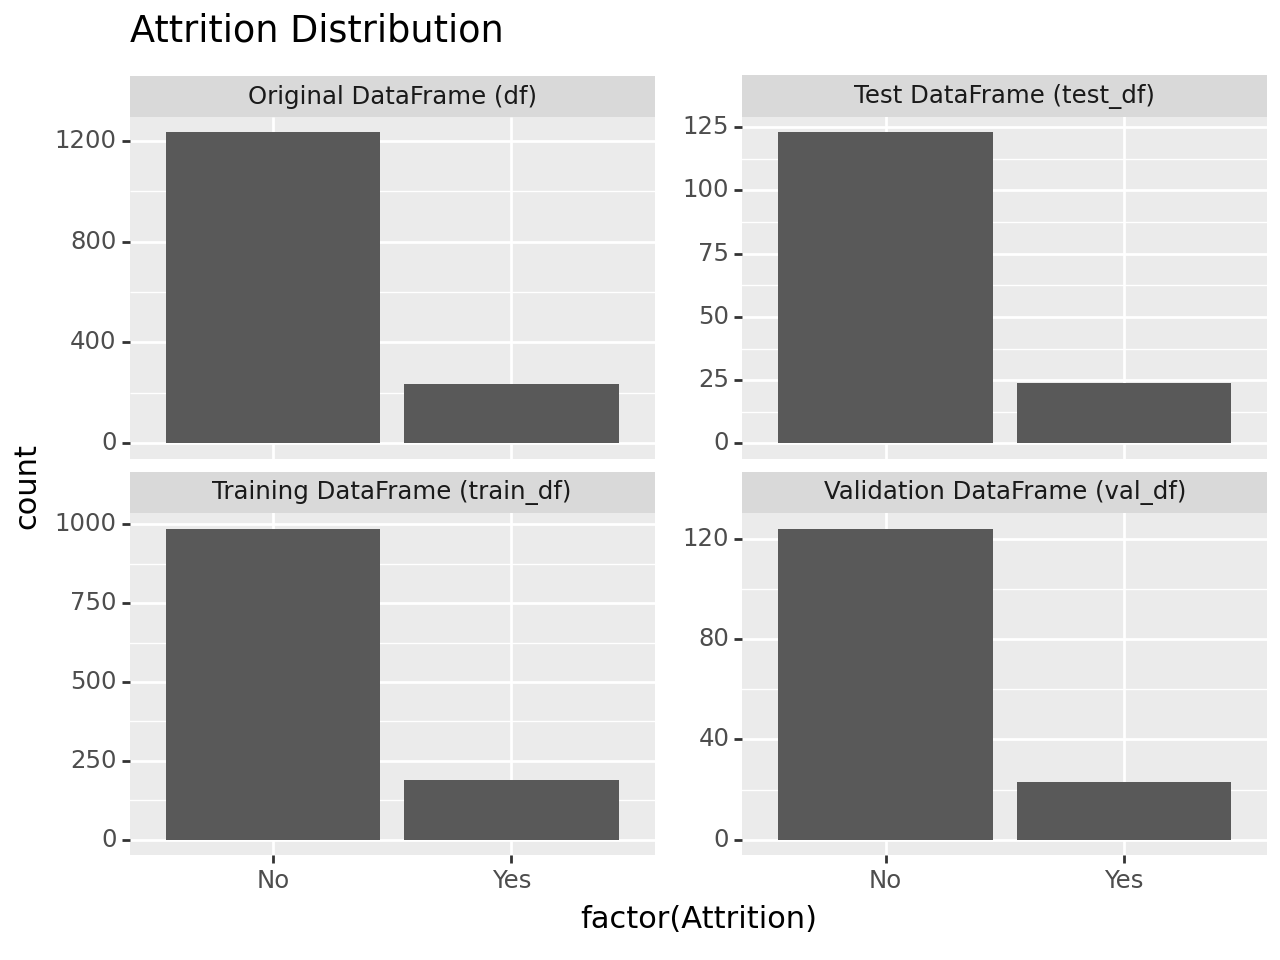

In [ ]:
# Combine all dataframes into one
combined_df = pd.concat([
    df.assign(dataset='Original DataFrame (df)'),
    train_df.assign(dataset='Training DataFrame (train_df)'),
    val_df.assign(dataset='Validation DataFrame (val_df)'),
    test_df.assign(dataset='Test DataFrame (test_df)'),
])

# Plotting using plotnine
plot = (ggplot(combined_df, aes(x='factor(Attrition)')) +
        geom_bar() +
        labs(title='Attrition Distribution') +
        facet_wrap('~ dataset', scales='free_y'))

# Display the plot
plot.draw()

In [ ]:
def plot_hist(data: List[int]):
    fig, ax = plt.subplots()

    # Bar plot
    data.plot(kind='bar', ax=ax, color=['blue', 'orange'])#, 'green', 'red'])


    ax.set_xlabel('Target')
    ax.set_ylabel('Count')
    ax.set_title('Target Counts Histogram')

    for i, count in enumerate(data):
        ax.text(i, count + 5, str(count), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

In [ ]:
# plot_hist(df['Attrition'].value_counts())

## EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

In [ ]:
attrition = train_df.copy()

In [ ]:
# Looking for NaN
display(attrition.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [ ]:
# # Plotting the KDEplots
# f, axes = plt.subplots(3, 3, figsize=(10, 8), 
#                        sharex=False, sharey=False)

# # Defining our colormap scheme
# s = np.linspace(0, 3, 10)
# cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# # Generate and plot
# x = attrition['Age'].values
# y = attrition['TotalWorkingYears'].values
# sns.kdeplot(x=x, y=y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
# axes[0,0].set( title = 'Age against Total working years')

# cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# # Generate and plot
# x = attrition['Age'].values
# y = attrition['DailyRate'].values
# sns.kdeplot(x=x, y=y, cmap=cmap, shade=True, ax=axes[0,1])
# axes[0,1].set( title = 'Age against Daily Rate')

# cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# # Generate and plot
# x = attrition['YearsInCurrentRole'].values
# y = attrition['Age'].values
# sns.kdeplot(x=x, y=y, cmap=cmap, shade=True, ax=axes[0,2])
# axes[0,2].set( title = 'Years in role against Age')

# cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# # Generate and plot
# x = attrition['DailyRate'].values
# y = attrition['DistanceFromHome'].values
# sns.kdeplot(x=x, y=y, cmap=cmap, shade=True,  ax=axes[1,0])
# axes[1,0].set( title = 'Daily Rate against DistancefromHome')

# cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# # Generate and plot
# x = attrition['DailyRate'].values
# y = attrition['JobSatisfaction'].values
# sns.kdeplot(x=x, y=y, cmap=cmap, shade=True,  ax=axes[1,1])
# axes[1,1].set( title = 'Daily Rate against Job satisfaction')

# cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# # Generate and plot
# x = attrition['YearsAtCompany'].values
# y = attrition['JobSatisfaction'].values
# sns.kdeplot(x=x, y=y, cmap=cmap, shade=True,  ax=axes[1,2])
# axes[1,2].set( title = 'Daily Rate against distance')

# cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# # Generate and plot
# x = attrition['YearsAtCompany'].values
# y = attrition['DailyRate'].values
# sns.kdeplot(x=x, y=y, cmap=cmap, shade=True,  ax=axes[2,0])
# axes[2,0].set( title = 'Years at company against Daily Rate')

# cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# # Generate and plot
# x = attrition['RelationshipSatisfaction'].values
# y = attrition['YearsWithCurrManager'].values
# sns.kdeplot(x=x, y=y, cmap=cmap, shade=True,  ax=axes[2,1])
# axes[2,1].set( title = 'Relationship Satisfaction vs years with manager')

# cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# # Generate and plot
# x = attrition['WorkLifeBalance'].values
# y = attrition['JobSatisfaction'].values
# sns.kdeplot(x=x, y=y, cmap=cmap, shade=True,  ax=axes[2,2])
# axes[2,2].set( title = 'WorklifeBalance against Satisfaction')

# f.tight_layout()

# Data Processing

In [ ]:
# # Define a dictionary for the target mapping
# target_map = {'Yes':1, 'No':0}

# # Use the pandas apply method to numerically encode our attrition target variable
# attrition["Attrition_numerical"] = attrition["Attrition"].apply(lambda x: target_map[x])

# Feature Engineering

plot some correlation for numerical feature

numerical = [u'Age', u'DailyRate', u'DistanceFromHome', 
             u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',
             u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
             u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
             u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
             u'StockOptionLevel', u'TotalWorkingYears',
             u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
             u'YearsInCurrentRole', u'YearsSinceLastPromotion',u'YearsWithCurrManager']

Drop non numeric and find categorical and numerical colunn

In [ ]:
# # Drop the Attrition_numerical column from attrition dataset first - Don't want to include that
# attrition = attrition.drop(['Attrition_numerical'], axis=1)

# Empty list to store columns with categorical data
categorical = []
for col, value in attrition.items():
    if value.dtype == 'object':
        categorical.append(col)

# Store the numerical columns in a list numerical
numerical = attrition.columns.difference(categorical)

Encode Cat data 

In [ ]:
# Store the categorical data in a dataframe called attrition_cat
attrition_cat = attrition[categorical]
attrition_cat = attrition_cat.drop(['Attrition'], axis=1) # Dropping the target column

attrition_num = attrition[numerical]


In [ ]:
for col in attrition_cat:
    print(f"Column: {col}\nCount: {attrition_cat[col].nunique()}")

Column: BusinessTravel
Count: 3
Column: Department
Count: 3
Column: EducationField
Count: 6
Column: Gender
Count: 2
Column: JobRole
Count: 9
Column: MaritalStatus
Count: 3
Column: Over18
Count: 1
Column: OverTime
Count: 2


In [ ]:
# Step 1: Create OneHotEncoder with handle_unknown='ignore'
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

# Step 2: Fit the encoder on the extracted categorical columns
ohe.fit(attrition_cat)

categories = ohe.categories_
feature_names = ohe.get_feature_names_out()


# Step 4: Transform the original DataFrame
df_encoded = ohe.transform(attrition_cat).toarray()


# If you want to create a DataFrame with feature names
df_encoded_cat = pd.DataFrame(df_encoded, columns=feature_names)

# Reset indices if needed
attrition_num = attrition_num.reset_index(drop=True)
df_encoded_cat = df_encoded_cat.reset_index(drop=True)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
attrition_final = pd.concat([attrition_num, df_encoded_cat], axis=1)
attrition_final
# # Step 3: Save the encoder using joblib
# joblib.dump(ohe, 'encoder.joblib')

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,44,528,1,3,1,1683,3,44,3,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,46,526,1,2,1,244,2,92,3,3,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,29,1246,19,3,1,1497,3,77,2,2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,41,1018,1,3,1,1349,3,66,3,2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,31,1079,16,4,1,1761,1,70,3,3,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,37,1252,19,2,1,904,1,32,3,3,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1172,37,674,13,3,1,1543,1,47,3,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1173,32,371,19,3,1,1739,4,80,1,3,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1174,32,604,8,3,1,1304,3,56,4,2,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [ ]:
# # Store the categorical data in a dataframe called attrition_cat
# attrition_cat = attrition[categorical]
# attrition_cat = attrition_cat.drop(['Attrition'], axis=1) # Dropping the target column

# attrition_cat = pd.get_dummies(attrition_cat)

# # Store the numerical features to a dataframe attrition_num
# attrition_num = attrition[numerical]

# # Concat the two dataframes together columnwise
# attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)
# attrition_final

## Training


In [ ]:
import os
import random

from pandas import DataFrame

In [ ]:
def set_seeds(seed=42):
    """Set seeds for reproducibility."""
    np.random.seed(seed)
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)

In [ ]:
def load_data():
    data_path = "../data/processed/HR_Employee_data.csv"
    df = pd.read_csv(data_path)
    ds = df.sample(frac=1, random_state=2023)
    return ds

In [ ]:
attrition_final.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobR

In [ ]:
train_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
import joblib


def preprocess(attrition: DataFrame, test=False, save_encoder=False) -> DataFrame:
    if not test:
        # Define a dictionary for the target mapping
        target_map = {'Yes':1, 'No':0}
        # Use the pandas apply method to numerically encode our attrition target variable
        target = attrition["Attrition"].apply(lambda x: target_map[x])
    

    attrition.drop(columns=["Attrition"], inplace=True)
    
    # Empty list to store columns with categorical data
    categorical = []
    for col, value in attrition.items():
        if value.dtype == 'object':
            categorical.append(col)

    # Store the numerical columns in a list numerical
    numerical = attrition.columns.difference(categorical)

    # Store the categorical data in a dataframe called attrition_cat
    attrition_cat = attrition[categorical]

    # Store the numerical features to a dataframe attrition_num
    attrition_num = attrition[numerical]
    

    ohe = OneHotEncoder()

    # Step 2: Fit the encoder on the extracted categorical columns
    ohe.fit(attrition_cat)

    categories = ohe.categories_
    feature_names = ohe.get_feature_names_out()

    if save_encoder:
        joblib.dump(ohe, '../model/saved_encoder/encoder.joblib')


    # Step 4: Transform the original DataFrame
    df_encoded = ohe.transform(attrition_cat).toarray()


    # If you want to create a DataFrame with feature names
    df_encoded_cat = pd.DataFrame(df_encoded, columns=feature_names)

    # Reset indices if needed
    attrition_num = attrition_num.reset_index(drop=True)
    df_encoded_cat = df_encoded_cat.reset_index(drop=True)

    # Concatenate the one-hot encoded DataFrame with the original DataFrame
    attrition_final = pd.concat([attrition_num, df_encoded_cat], axis=1)
    
    
    #attrition_final['target'] = target
    return attrition_final, target

In [ ]:
# def preprocess(attrition: DataFrame) -> DataFrame:
#     # Empty list to store columns with categorical data
#     categorical = []
#     for col, value in attrition.items():
#         if value.dtype == 'object':
#             categorical.append(col)

#     # Store the numerical columns in a list numerical
#     numerical = attrition.columns.difference(categorical)

#     # Store the categorical data in a dataframe called attrition_cat
#     attrition_cat = attrition[categorical]
#     attrition_cat = attrition_cat.drop(['Attrition'], axis=1) # Dropping the target column
#     attrition_cat = pd.get_dummies(attrition_cat)

#     # Store the numerical features to a dataframe attrition_num
#     attrition_num = attrition[numerical]
#     # Concat the two dataframes together columnwise
#     attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)

#     # Define a dictionary for the target mapping
#     target_map = {'Yes':1, 'No':0}
#     # Use the pandas apply method to numerically encode our attrition target variable
#     target = attrition["Attrition"].apply(lambda x: target_map[x])
#     #attrition_final['target'] = target
#     return attrition_final, target

## Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
import xgboost

seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}
rf = RandomForestClassifier(**rf_params)

In [ ]:
ds = load_data()
tran_ds, val_ds, test_ds = stratify_split(df)

train_X, train_Y = preprocess(tran_ds)
val_X, val_Y = preprocess(val_ds)

In [ ]:
oversampler=SMOTE(sampling_strategy='auto',random_state=0)
smote_train, smote_target = oversampler.fit_resample(train_X,train_Y)

In [ ]:
%%time
# Train
rf.fit(smote_train, smote_target)

CPU times: user 1.28 s, sys: 596 ms, total: 1.87 s
Wall time: 672 ms


RandomForestClassifier(max_depth=4, min_samples_leaf=2, n_estimators=1000,
                       n_jobs=-1, random_state=0)

In [ ]:
rf_predictions = rf.predict(val_X)
print("Accuracy score: {}".format(accuracy_score(val_Y, rf_predictions)))
print("="*80)
print(classification_report(val_Y, rf_predictions))

Accuracy score: 0.8843537414965986
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       124
           1       0.67      0.52      0.59        23

    accuracy                           0.88       147
   macro avg       0.79      0.74      0.76       147
weighted avg       0.88      0.88      0.88       147



In [ ]:
index_to_class = {1: "Yes" , 0: "No"}
class_to_index = {"Yes": 1, "No": 0}

def format_prob(prob, index_to_class):
    d = {}
    for i, item in enumerate(prob):
        d[index_to_class[i]] = item
    return d

In [ ]:
rf_predictions = rf.predict(val_X)
rf_probabilities = rf.predict_proba(val_X)
results = []
for i, prob in enumerate(rf_probabilities):
    pred_y = index_to_class[prob.argmax()]
    results.append({"prediction": pred_y, "probabilities": format_prob(prob, index_to_class)})


In [ ]:
# # Get feature importances
# feature_importances = rf.feature_importances_

# # Create a DataFrame to display feature importances
# feature_importance_df = pd.DataFrame({
#     'Feature': attrition_final.columns.values,
#     'Importance': feature_importances
# })

# # Sort DataFrame by importance in descending order
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# # Print the feature importance
# print("Feature Importance:")
# print(feature_importance_df)

In [ ]:
# import ipywidgets as widgets
# from IPython.display import display, Image
# from sklearn.tree import plot_tree

# def visualize_tree_interactive(rf, feature_names, tree_index):
#     # Visualize the selected tree
#     tree = rf.estimators_[tree_index]
#     plt.figure(figsize=(20, 10))
#     tree_viz = plot_tree(tree, feature_names=feature_names, filled=True, rounded=True, class_names=True)
    
#     # Save the visualization to a file
#     image_path = "tree_viz.png"
#     plt.savefig(image_path, format='png')
#     plt.close()

#     # Display the visualization using the Image widget
#     image_widget = Image(filename=image_path)
#     display(image_widget)

# def on_tree_index_change(change):
#     # Callback function when the tree index changes
#     visualize_tree_interactive(rf, feature_names, change.new)

# # Assume rf and feature_names are already defined

# # Create a widget for selecting the tree index
# max_tree_index = len(rf.estimators_) - 1
# tree_index_selector = widgets.IntSlider(value=0, min=0, max=max_tree_index, step=1, description='Tree Index:')
# tree_index_selector.observe(on_tree_index_change, names='value')

# feature_names = attrition_final.columns.values
# # Display the initial tree visualization
# visualize_tree_interactive(rf, feature_names, tree_index_selector.value)

# # Display the widget
# display(tree_index_selector)

## Tracking Implementation

In [ ]:
import mlflow
from pathlib import Path
import time 

Windows:

MLFLOW_TRACKING_URI = "file:///" + str(MODEL_REGISTRY.absolute())


In [ ]:
ROOT_DIR = Path(os.path.abspath('..'))
EFS_DIR = Path(f"/efs/shared_storage/attrition_pred/{os.environ.get('GITHUB_USERNAME', '')}")
try:
    Path(EFS_DIR).mkdir(parents=True, exist_ok=True)
except OSError:
    EFS_DIR = Path(ROOT_DIR, "efs")
    Path(EFS_DIR).mkdir(parents=True, exist_ok=True)

# Config MLflow
MODEL_REGISTRY = Path(f"{EFS_DIR}/mlflow")
Path(MODEL_REGISTRY).mkdir(parents=True, exist_ok=True)
MLFLOW_TRACKING_URI = "file://" + str(MODEL_REGISTRY.absolute())
MLFLOW_TRACKING_URI = "file://" + str(MODEL_REGISTRY.absolute())
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

In [ ]:
# MODEL_REGISTRY = Path(os.path.join(os.path.abspath('..'),"log", "mlflow"))
# Path(MODEL_REGISTRY).mkdir(parents=True, exist_ok=True)
# MLFLOW_TRACKING_URI = "file://" + str(MODEL_REGISTRY.absolute())

# mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

In [ ]:
print(MLFLOW_TRACKING_URI)

file:///Users/bibekkarki/Desktop/UT-Courses /Learning/hr_ibm-madewithML/efs/mlflow


In [ ]:
# # MLflow callback
# experiment_name = f"Enp_Retention(IBM)-{int(time.time())}"
# print(experiment_name)

In [ ]:
# MLflow callback
experiment_name = f"attrition_pred"
print(experiment_name)

attrition_pred


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd
from pandas import DataFrame
import json
from io import BytesIO

from mlflow import set_experiment, start_run, log_param, log_metric, log_artifacts, end_run
from typing import Optional, Dict
import mlflow
import joblib

class MLflowLogger:
    def __init__(
        self,
        experiment_name: Optional[str] = None,
        description: Optional[str] = None,
        tags: Optional[Dict] = None,
        save_model: Optional[bool] = True,
    ):
        self.experiment_name = experiment_name
        self.description = description
        self.tags = tags
        self.save_model = save_model
        # Setup mlflow
        self.setup_mlflow()

    def setup_mlflow(self):
        set_experiment(self.experiment_name)

    def start_run(self):
        # Start a run after setting up the experiment
        with start_run(run_name=self.experiment_name, tags=self.tags):
            pass

    def end_run(self):
        end_run()

    def log_param(self, key: str, value):
        log_param(key, value)

    def log_metric(self, key: str, value):
        log_metric(key, value)

    def log_transformation(self, transformation_name, details):
        parent_key = "Data Transformation"
        mlflow.log_param(f"{parent_key}/{transformation_name}_details", details)
        mlflow.set_tag(f"{parent_key}/{transformation_name}_applied", "true")

    def save_artifacts(self, artifacts: dict):
        try:
            # Log each artifact individually
            for artifact_name, artifact_path in artifacts.items():
                log_artifacts(artifact_path, artifact_name)
        except Exception as e:
            print(f"Failed to save artifacts: {e}")


    def finish_run(self, failed: bool = False):
        status = "FINISHED" if not failed else "FAILED"
        end_run(status=status)

In [ ]:

expirement_description = """Random Forrest Applied.
Label encoding and other details.
"""
# Instantiate your MLflow logger
mlflow_logger = MLflowLogger(experiment_name=experiment_name, description=expirement_description)

# Start the run after setting up the experiment
mlflow_logger.start_run()

# Transformation
label_encoding_details = "Label encoding applied to categorical columns."
mlflow_logger.log_transformation("label_encoding", label_encoding_details)

# Log your parameters
mlflow_logger.log_param("n_estimators", rf_params['n_estimators'])
mlflow_logger.log_param("max_features", rf_params['max_features'])
mlflow_logger.log_param("max_depth", rf_params['max_depth'])
mlflow_logger.log_param("min_samples_leaf", rf_params['min_samples_leaf'])

try:
    # ... Your training code here ...
    rf = RandomForestClassifier(**rf_params)

    ds = load_data()
    tran_ds, val_ds, test_ds = stratify_split(df)
    
    train_X, train_Y = preprocess(tran_ds, save_encoder=True)
    val_X, val_Y = preprocess(val_ds)

    oversampler=SMOTE(sampling_strategy='auto',random_state=0)
    smote_train, smote_target = oversampler.fit_resample(train_X,train_Y)

    rf.fit(smote_train, smote_target)

    if mlflow_logger.save_model:
        joblib.dump(rf, '../model/saved_model/random_forest_model.joblib')


    rf_predictions = rf.predict(val_X)
    rf_probabilities = rf.predict_proba(val_X)

    results = [{"prediction": index_to_class[prob.argmax()], "probabilities": format_prob(prob, index_to_class)} for prob in rf_probabilities]


    # Get feature importances
    feature_importances = rf.feature_importances_


    # Log accuracy score
    accuracy = accuracy_score(val_Y, rf_predictions)
    mlflow_logger.log_metric("accuracy", accuracy)

    # Log classification report
    report_dict = classification_report(val_Y, rf_predictions, output_dict=True)
    for metric, value in report_dict.items():
        if isinstance(value, dict):
            for submetric, score in value.items():
                # Preprocess metric names if needed
                metric_name = f"{metric}_{submetric}".replace(" ", "_").replace("&", "and")
                mlflow_logger.log_metric(metric_name, score)
        else:
            mlflow_logger.log_metric(metric, value)

    feature_importance_dict = {feature: float(importance) for feature, importance in zip(attrition_final.columns.values, feature_importances)}
    feature_importance_file = "../reports/viz/feature_importance.json"
    with open(feature_importance_file, 'w') as f:
        json.dump(feature_importance_dict, f, indent=2)


    # Visualize and log confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix(val_Y, rf_predictions), annot=True, fmt="d")
    plt.title("Confusion Matrix")
    confusion_matrix_file = "../reports/viz/confusion_matrix_plot.png"
    plt.savefig(confusion_matrix_file)
    plt.close()
    artifacts ={
        "visuals": "../reports/viz/",
        "model_weight": "../model/saved_model/",
        "encoder": "../model/saved_encoder/"
    }
    mlflow_logger.save_artifacts(artifacts)

    print("Training Ended Sucessfully")
except Exception as e:
    print(f"Training Failed: {e}")
    # Ensure that the run is properly ended in case of an exception
    mlflow_logger.finish_run(failed=True)
finally:
    # Ensure that the run is properly ended
    mlflow_logger.finish_run()

2023/12/18 14:13:54 INFO mlflow.tracking.fluent: Experiment with name 'attrition_pred' does not exist. Creating a new experiment.


Training Ended Sucessfully


In [ ]:
print(experiment_name)

attrition_pred


In [ ]:
import mlflow

# Search runs and order by F1 score in descending order
sorted_runs = mlflow.search_runs(experiment_names=[experiment_name], order_by=["metrics.f1_score DESC"])
# Display the sorted runs
print(sorted_runs)


                             run_id       experiment_id    status  \
0  5d2575f94915464db85f82f33eb06efd  449095958053341281  FINISHED   
1  0450b623ebd943bf9d63dfaa3ab7aa03  449095958053341281  FINISHED   

                                        artifact_uri  \
0  file:///Users/bibekkarki/Desktop/UT-Courses /L...   
1  file:///Users/bibekkarki/Desktop/UT-Courses /L...   

                        start_time                         end_time  \
0 2023-12-18 21:13:54.692000+00:00 2023-12-18 21:13:55.905000+00:00   
1 2023-12-18 21:13:54.687000+00:00 2023-12-18 21:13:54.691000+00:00   

   metrics.weighted_avg_recall  metrics.1_precision  metrics.accuracy  \
0                     0.884354             0.666667          0.884354   
1                          NaN                  NaN               NaN   

   metrics.0_recall  ...  params.n_estimators  params.max_depth  \
0          0.951613  ...                 1000                 4   
1               NaN  ...                 None          

In [ ]:
# Best run
best_run = sorted_runs.iloc[0]
best_run

run_id                                                                5d2575f94915464db85f82f33eb06efd
experiment_id                                                                       449095958053341281
status                                                                                        FINISHED
artifact_uri                                         file:///Users/bibekkarki/Desktop/UT-Courses /L...
start_time                                                            2023-12-18 21:13:54.692000+00:00
end_time                                                              2023-12-18 21:13:55.905000+00:00
metrics.weighted_avg_recall                                                                   0.884354
metrics.1_precision                                                                           0.666667
metrics.accuracy                                                                              0.884354
metrics.0_recall                                                         

In [ ]:
best_run

run_id                                                                5d2575f94915464db85f82f33eb06efd
experiment_id                                                                       449095958053341281
status                                                                                        FINISHED
artifact_uri                                         file:///Users/bibekkarki/Desktop/UT-Courses /L...
start_time                                                            2023-12-18 21:13:54.692000+00:00
end_time                                                              2023-12-18 21:13:55.905000+00:00
metrics.weighted_avg_recall                                                                   0.884354
metrics.1_precision                                                                           0.666667
metrics.accuracy                                                                              0.884354
metrics.0_recall                                                         

In [ ]:
from urllib.parse import urlparse
from PIL import Image

best_run_id = best_run.run_id
artifact_dir = urlparse(mlflow.get_run(best_run_id).info.artifact_uri).path


def get_artifact(run_id):
    artifact_dir = urlparse(mlflow.get_run(run_id).info.artifact_uri).path  # get path from mlflow
    img = Image.open(os.path.join(artifact_dir,"visuals","confusion_matrix_plot.png"))
    return img

art_test = get_artifact(run_id=best_run.run_id)


In [ ]:
def get_model_weight(run_id):
    artifact_dir = urlparse(mlflow.get_run(best_run_id).info.artifact_uri).path
    weight_path = os.path.join(artifact_dir,"model_weight","random_forest_model.joblib")
    return weight_path

best_run_id = best_run.run_id
weight_path = get_model_weight(best_run_id)
loaded_rf_model = joblib.load(weight_path)

# Make predictions using the loaded model
predictions = loaded_rf_model.predict(val_X)

print(classification_report(val_Y, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       124
           1       0.67      0.52      0.59        23

    accuracy                           0.88       147
   macro avg       0.79      0.74      0.76       147
weighted avg       0.88      0.88      0.88       147



## GridSearch

In [ ]:


# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_jobs': [-1],
#     'n_estimators': [100, 200, 500],
#     'max_depth': [2, 4 ,8],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt']  # Add max_features
# }
# rf_classifier = RandomForestClassifier()
# grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='f1_macro')
# grid_search.fit(train_X, train_Y)


# best_rf_model = grid_search.best_estimator_

In [ ]:
# # Make predictions using the loaded model
# predictions = best_rf_model.predict(val_X)
# print(classification_report(val_Y, predictions))

In [ ]:
# best_params = grid_search.best_params_

# # Print the best parameters
# print("Best Parameters:", best_params)

# Model Evaluation

In [ ]:
index_to_class = {1: "Yes" , 0: "No"}
class_to_index = {"Yes": 1, "No": 0}

## Overall Metric

In [ ]:
print(classification_report(val_Y, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       124
           1       0.67      0.52      0.59        23

    accuracy                           0.88       147
   macro avg       0.79      0.74      0.76       147
weighted avg       0.88      0.88      0.88       147



## Per Class Metric

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import numpy as np
from collections import OrderedDict

def calculate_class_metrics(y_true, y_pred, class_to_index):
    metrics = {}
    
    # Per-class metrics
    class_metrics = precision_recall_fscore_support(y_true, y_pred, average=None)

    for i, _class in enumerate(class_to_index):
        metrics[_class] = {
            "precision": class_metrics[0][i],
            "recall": class_metrics[1][i],
            "f1": class_metrics[2][i],
            "num_samples": np.float64(class_metrics[3][i]),
        }
    sorted_per_class_metrics = OrderedDict(sorted(metrics.items(), key=lambda tag: tag[1]["f1"], reverse=True))
    return sorted_per_class_metrics


metrics = calculate_class_metrics(val_Y, predictions, index_to_class)

# Display the metrics
for _class, metrics_dict in metrics.items():
    print(f"Metrics for {index_to_class[_class]}:")
    print(f"Precision: {metrics_dict['precision']}")
    print(f"Recall: {metrics_dict['recall']}")
    print(f"F1 Score: {metrics_dict['f1']}")
    print(f"Number of Samples: {metrics_dict['num_samples']}")
    print("\n")


Metrics for Yes:
Precision: 0.9147286821705426
Recall: 0.9516129032258065
F1 Score: 0.932806324110672
Number of Samples: 124.0


Metrics for No:
Precision: 0.6666666666666666
Recall: 0.5217391304347826
F1 Score: 0.5853658536585366
Number of Samples: 23.0




In [ ]:
val_df["predictions"] = predictions

In [ ]:
val_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'predictions'],
      dtype='object')

Look At where we are making mistakes

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

def calculate_samples_for_class(y_true, y_pred, class_index):
    tp, fp, fn = [], [], []

    for i, (true, pred) in enumerate(zip(y_true, y_pred)):
        if class_index == true == pred:
            tp.append(i)
        elif class_index != true and class_index == pred:
            fp.append(i)
        elif class_index == true and class_index != pred:
            fn.append(i)

    return tp, fp, fn

def display_samples(df, indices, title):
    print(indices)
    if len(indices) > 2:
        num_samples = 3
        print(f"\n=== {title} ===")
        print(indices[:num_samples])
        for index in indices[:num_samples]:
            print(f"{df.iloc[index]}")
            print(f"    true: {df.Attrition.iloc[index]}")
            print(f"    pred: {df.predictions.iloc[index]}\n")

# Example usage
# Assuming you have your true labels (y_test) and predicted labels (y_pred)
# Replace 'class1', 'class2', etc., with the actual class labels in your dataset

class_labels = [1,0]  # Replace with your actual class labels

for class_label in class_labels:
    print(class_label)
    class_index = class_label#preprocessor.class_to_index[class_label]

    # Calculate TP, FP, FN for the current class
    tp, fp, fn = calculate_samples_for_class(val_X, predictions, class_index)
    
    # Display samples for TP, FP, FN
    display_samples(val_df, tp, f"True Positives for {class_label}")
    display_samples(val_df, fp, f"False Positives for {class_label}")
    display_samples(val_df, fn, f"False Negatives for {class_label}")


1
[]
[25, 28, 33, 47, 50, 53]

=== False Positives for 1 ===
[25, 28, 33]
Age                                             24
Attrition                                      Yes
BusinessTravel                   Travel_Frequently
DailyRate                                     1287
Department                  Research & Development
DistanceFromHome                                 7
Education                                        3
EducationField                       Life Sciences
EmployeeCount                                    1
EmployeeNumber                                 647
EnvironmentSatisfaction                          1
Gender                                      Female
HourlyRate                                      55
JobInvolvement                                   3
JobLevel                                         1
JobRole                      Laboratory Technician
JobSatisfaction                                  3
MaritalStatus                              Married
MonthlyI

## Low Confidence

In [ ]:
# Tag to inspect
class_label = "No"
index = class_to_index[class_label]
indices = np.where(val_Y==index)[0]

# Confidence score for the correct class is below a threshold
low_confidence = []
min_threshold = 0.5
for i in indices:
    prob = rf_probabilities[i][index]
    if prob <= 0.5:
        low_confidence.append({
            "attr": f"{val_df.iloc[i]}",
            "true": val_df.Attrition.iloc[i],
            "pred": index_to_class[val_df.predictions.iloc[i]],
            "prob": prob})

In [ ]:
low_confidence[0]

{'attr': 'Age                                             33\nAttrition                                       No\nBusinessTravel                   Travel_Frequently\nDailyRate                                     1392\nDepartment                  Research & Development\nDistanceFromHome                                 3\nEducation                                        4\nEducationField                       Life Sciences\nEmployeeCount                                    1\nEmployeeNumber                                   5\nEnvironmentSatisfaction                          4\nGender                                      Female\nHourlyRate                                      56\nJobInvolvement                                   3\nJobLevel                                         1\nJobRole                         Research Scientist\nJobSatisfaction                                  3\nMaritalStatus                              Married\nMonthlyIncome                                 2909\nMo

## Slicing

In [ ]:
from snorkel.slicing import slicing_function
from snorkel.slicing import PandasSFApplier
from snorkel.slicing import slice_dataframe

In [ ]:
val_df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,predictions
616,51,No,Travel_Rarely,1318,Sales,26,4,Marketing,1,851,...,80,1,29,2,2,20,6,4,17,0
649,53,No,Travel_Rarely,102,Research & Development,23,4,Life Sciences,1,901,...,80,0,33,0,3,12,9,3,8,0
276,35,No,Travel_Rarely,1315,Research & Development,22,3,Life Sciences,1,381,...,80,1,10,6,2,7,7,6,2,0


In [ ]:
@slicing_function()
def research_pos(x):
    """Look At research Department with attrition"""
    reseach_dep_attrition = "Yes" in x.Attrition
    terms = ["research"]
    research_deps = any(s.lower() in x.Department.lower() for s in terms)
    return (reseach_dep_attrition and research_deps)

In [ ]:
reseach_dep_attrition_df = slice_dataframe(val_df, research_pos)
reseach_dep_attrition_df[["Department", "Attrition"]].head()

100%|██████████| 147/147 [00:00<00:00, 77750.65it/s]


,Department,Attrition
761,Research & Development,Yes
1016,Research & Development,Yes
479,Research & Development,Yes
892,Research & Development,Yes
780,Research & Development,Yes


In [ ]:
@slicing_function()
def old_population(x):
    yes_attrition = "Yes" in x.Attrition
    return (x.Age > 50) and yes_attrition



In [ ]:
olderGen_df = slice_dataframe(val_df, old_population)
olderGen_df[["Age", "Attrition"]].head()

100%|██████████| 147/147 [00:00<00:00, 82904.76it/s]

,Age,Attrition
660,58,Yes
608,55,Yes


In [ ]:
slicing_functions = [research_pos, old_population]
applier = PandasSFApplier(slicing_functions)
slices = applier.apply(val_df)
slices

100%|██████████| 147/147 [00:00<00:00, 48180.25it/s]


rec.array([(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),
           (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),
           (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),
           (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0),
           (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),
           (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0),
           (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),
           (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),
           (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0),
           (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0),
           (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),
           (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),
           (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),
           (0, 0), (0, 0)

In [ ]:
len(predictions)

147

In [ ]:
len(val_Y)

147

In [ ]:
# Score slices
metrics["slices"] = {}
for slice_name in slices.dtype.names:
    mask = slices[slice_name].astype(bool)
    if sum(mask):
        slice_metrics = precision_recall_fscore_support(
            val_Y[mask], predictions[mask], average="micro"
        )
        metrics["slices"][slice_name] = {}
        metrics["slices"][slice_name]["precision"] = slice_metrics[0]
        metrics["slices"][slice_name]["recall"] = slice_metrics[1]
        metrics["slices"][slice_name]["f1"] = slice_metrics[2]
        metrics["slices"][slice_name]["num_samples"] = len(val_Y[mask])

In [ ]:
print(json.dumps(metrics["slices"], indent=2))

{
  "research_pos": {
    "precision": 0.5,
    "recall": 0.5,
    "f1": 0.5,
    "num_samples": 12
  },
  "old_population": {
    "precision": 0.5,
    "recall": 0.5,
    "f1": 0.5,
    "num_samples": 2
  }
}


# Online Model Serving

In [ ]:
best_run_id = best_run.run_id
weight_path = get_model_weight(best_run_id)
rf_model = joblib.load(weight_path)

Change this preprocess to actual thing that takes maybe dict

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
623,30,No,Travel_Frequently,1012,Research & Development,5,4,Life Sciences,1,861,...,2,80,1,10,3,2,5,4,0,3
1064,30,No,Travel_Rarely,330,Human Resources,1,3,Life Sciences,1,1499,...,1,80,1,6,3,4,5,3,1,3
1305,54,No,Travel_Rarely,431,Research & Development,7,4,Medical,1,1830,...,2,80,1,14,2,2,7,1,1,7


In [ ]:
test_A_df = test_df.iloc[:3]

In [ ]:
test_A_df.to_csv("test.csv", index=False)

In [ ]:
test_A_df = test_df.iloc[:3]
test_A_df.drop(columns=["Attrition"],inplace=True)
test_A_df 

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
623,30,Travel_Frequently,1012,Research & Development,5,4,Life Sciences,1,861,2,...,2,80,1,10,3,2,5,4,0,3
1064,30,Travel_Rarely,330,Human Resources,1,3,Life Sciences,1,1499,3,...,1,80,1,6,3,4,5,3,1,3
1305,54,Travel_Rarely,431,Research & Development,7,4,Medical,1,1830,4,...,2,80,1,14,2,2,7,1,1,7


In [ ]:
import joblib


def preprocess_test(attrition: DataFrame, encoder_path=False) -> DataFrame:
    # Empty list to store columns with categorical data
    categorical = []
    for col, value in attrition.items():
        if value.dtype == 'object':
            categorical.append(col)

    # Store the numerical columns in a list numerical
    numerical = attrition.columns.difference(categorical)

    # Store the categorical data in a dataframe called attrition_cat
    attrition_cat = attrition[categorical]

    # Store the numerical features to a dataframe attrition_num
    attrition_num = attrition[numerical]
    
    encoder_path = Path(encoder_path,'encoder.joblib')
    loaded_encoder = joblib.load(encoder_path)
    feature_names = loaded_encoder.get_feature_names_out()

    # Step 4: Transform the original DataFrame
    df_encoded = loaded_encoder.transform(attrition_cat).toarray()

    # If you want to create a DataFrame with feature names
    df_encoded_cat = pd.DataFrame(df_encoded, columns=feature_names)

    # Reset indices if needed
    attrition_num = attrition_num.reset_index(drop=True)
    df_encoded_cat = df_encoded_cat.reset_index(drop=True)

    # Concatenate the one-hot encoded DataFrame with the original DataFrame
    attrition_final = pd.concat([attrition_num, df_encoded_cat], axis=1)
    
    
    #attrition_final['target'] = target
    return attrition_final

In [ ]:
test_X = preprocess_test(test_A_df,encoder_path='../model/saved_encoder')

In [ ]:
rf_model.predict(test_X)

array([0, 0, 0])

In [ ]:

test_df.iloc[:3]["Attrition"]

623     No
1064    No
1305    No
Name: Attrition, dtype: object

In [ ]:
# Can also do 
# # Specify the expected format for data(=)
# class Data(BaseModel):
#     title: str
#     content: str
#     published: bool = True
#     rating: Optional[int] = None

# @app.post("/predict")
# def creat_post(data: Data):
#     post_dict = data.model_dump()
#     ## Do preprocess and Prediction
#     result = None
#     return {"result": result}

In [ ]:
# Endpoint for making predictions
@app.post("/predict/")
async def predict(request: Request):
    try:
        data = await request.json()

        sample_test = data.get("sample_test")

        # Make predictions using the trained model
        rf_predictions = rf_model.predict(sample_test)
        rf_probabilities = rf_model.predict_proba(sample_test)

        # Format results
        results = [{"prediction": int(prediction), "probabilities": probabilities.tolist()} for prediction, probabilities in zip(rf_predictions, rf_probabilities)]

        return JSONResponse(content={"results": results})
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))

In [ ]:
sample_test

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
1095,33,589,28,4,1,1549,2,79,3,2,...,False,False,False,False,False,True,False,True,False,True


In [ ]:
data_t = sample_test.to_dict()
flattened_data = {key: value[next(iter(value))] for key, value in data_t.items()}
flattened_data
pd.DataFrame([flattened_data])

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,33,589,28,4,1,1549,2,79,3,2,...,False,False,False,False,False,True,False,True,False,True


In [ ]:
weight_path = r"../log/mlflow/234382354845373750/bc12b4ac1d7d4bb19ab6c33c63995422/artifacts/model_weight/random_forest_model.joblib"

rf_model = joblib.load(weight_path)

data_t = sample_test
data_t = data_t.to_dict()
flattened_data = {key: value[next(iter(value))] for key, value in data_t.items()}
df = pd.DataFrame([flattened_data])
print(df)
rf_model.predict(df)

   Age  DailyRate  DistanceFromHome  Education  EmployeeCount  EmployeeNumber  \
0   33        589                28          4              1            1549   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  ...  \
0                        2          79               3         2  ...   

   JobRole_Research Director  JobRole_Research Scientist  \
0                      False                       False   

   JobRole_Sales Executive  JobRole_Sales Representative  \
0                    False                         False   

   MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
0                   False                   True                 False   

   Over18_Y  OverTime_No  OverTime_Yes  
0      True        False          True  

[1 rows x 55 columns]


array([0])

In [ ]:
#Run it in terminal
# uvicorn main:app --reload



In [ ]:
data_t = sample_test
data_t = data_t.to_dict()
flattened_data = {key: value[next(iter(value))] for key, value in data_t.items()}
df = pd.DataFrame([flattened_data])
print(df)
rf_model.predict(df)

In [ ]:
import requests
import json

# Define a function to make a query to the FastAPI endpoint
def make_prediction_query(data):
    url = "http://127.0.0.1:8000/predict/"

    #sample_test_json = data.to_json()
    sample_test_dict = data.to_dict()
    flattened_data = {key: value[next(iter(value))] for key, value in sample_test_dict.items()}
    # Send a POST request to the /predict/ endpoint
    response = requests.post(url, json={"data": flattened_data})

    # Print the JSON response
    print(response.json())


In [ ]:
# Make a query 
make_prediction_query(sample_test)

{'results': [{'prediction': 0, 'probabilities': [0.6393793796067369, 0.360620620393262]}]}


In [ ]:
best_run_id

'df3e02807a51427d867bfcf92257d507'

In [ ]:
urlparse(mlflow.get_run(best_run_id).info.artifact_uri).path

'/Users/bibekkarki/Desktop/UT-Courses /Learning/hr_ibm-madewithML/efs/mlflow/458800107370886466/df3e02807a51427d867bfcf92257d507/artifacts'

In [ ]:
from attrition_pred.evaluate import evaluate

In [ ]:
from attrition_pred.predict import predict

In [ ]:
sample_data_test_df = test_df.drop(columns=["Attrition"]).iloc[0]
sample_data_test_df

Age                                             30
BusinessTravel                   Travel_Frequently
DailyRate                                     1012
Department                  Research & Development
DistanceFromHome                                 5
Education                                        4
EducationField                       Life Sciences
EmployeeCount                                    1
EmployeeNumber                                 861
EnvironmentSatisfaction                          2
Gender                                        Male
HourlyRate                                      75
JobInvolvement                                   2
JobLevel                                         1
JobRole                         Research Scientist
JobSatisfaction                                  4
MaritalStatus                             Divorced
MonthlyIncome                                 3761
MonthlyRate                                   2373
NumCompaniesWorked             

In [ ]:
sample_data_test = dict(sample_data_test_df)
sample_data_test

{'Age': 30,
 'BusinessTravel': 'Travel_Frequently',
 'DailyRate': 1012,
 'Department': 'Research & Development',
 'DistanceFromHome': 5,
 'Education': 4,
 'EducationField': 'Life Sciences',
 'EmployeeCount': 1,
 'EmployeeNumber': 861,
 'EnvironmentSatisfaction': 2,
 'Gender': 'Male',
 'HourlyRate': 75,
 'JobInvolvement': 2,
 'JobLevel': 1,
 'JobRole': 'Research Scientist',
 'JobSatisfaction': 4,
 'MaritalStatus': 'Divorced',
 'MonthlyIncome': 3761,
 'MonthlyRate': 2373,
 'NumCompaniesWorked': 9,
 'Over18': 'Y',
 'OverTime': 'No',
 'PercentSalaryHike': 12,
 'PerformanceRating': 3,
 'RelationshipSatisfaction': 2,
 'StandardHours': 80,
 'StockOptionLevel': 1,
 'TotalWorkingYears': 10,
 'TrainingTimesLastYear': 3,
 'WorkLifeBalance': 2,
 'YearsAtCompany': 5,
 'YearsInCurrentRole': 4,
 'YearsSinceLastPromotion': 0,
 'YearsWithCurrManager': 3}

In [ ]:
predict(sample_data_test, best_run_id)

[
  {
    "0": 0.7108957960496883,
    "1": 0.2891042039503126
  }
]


[{0: 0.7108957960496883, 1: 0.2891042039503126}]

In [ ]:
best_run_id


'5d2575f94915464db85f82f33eb06efd'

In [ ]:
evaluate(best_run_id, "test.csv")

100%|██████████| 3/3 [00:00<00:00, 9225.01it/s]

2
2
{
  "timestamp": "December 18, 2023 02:42:31 PM",
  "run_id": "5d2575f94915464db85f82f33eb06efd",
  "overall": {
    "precision": 1.0,
    "recall": 1.0,
    "f1": 1.0,
    "num_samples": 3.0
  },
  "per_class": {
    "Yes": {
      "precision": 1.0,
      "recall": 1.0,
      "f1": 1.0,
      "num_samples": 3.0
    }
  },
  "slices": {}
}


{'timestamp': 'December 18, 2023 02:42:31 PM',
 'run_id': '5d2575f94915464db85f82f33eb06efd',
 'overall': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'num_samples': 3.0},
 'per_class': OrderedDict([('Yes',
               {'precision': 1.0,
                'recall': 1.0,
                'f1': 1.0,
                'num_samples': 3.0})]),
 'slices': {}}